In [1]:
# importing kaggle library
import kaggle

# Download the dataset
kaggle.api.dataset_download_files("dubradave/hospital-readmissions", path=r"C:\Users\Mr Amir Mufti", unzip=True)

print("Dataset downloaded successfully")

Dataset URL: https://www.kaggle.com/datasets/dubradave/hospital-readmissions
Dataset downloaded successfully


In [101]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [69]:
# loading file in to dataframe
df = pd.read_csv(r"C:\Users\Mr Amir Mufti\hospital_readmissions.csv")

# Exploratory Data Analysis

In [5]:
# checking the data (top rows)
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [6]:
# exploring the dataset
df.describe(include='all')

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
count,25000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,8,8,8,3,3,2,2,2
top,[70-80),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Circulatory,Other,Other,no,no,no,yes,no
freq,6837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12382,7824,9056,9107,23625,20938,13497,19228,13246
mean,NaN,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### There seems to be some outliers in n_outpatient, n_inpatient, and n_emergency, however, this needs to be explored further.

In [7]:
# ensuring no missing values
df.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [9]:
# checking the unique values in each column
for column in df.columns:
    print(f"Unique values in '{column}':", df[column].unique())

Unique values in 'age': ['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']
Unique values in 'time_in_hospital': [ 8  3  5  2  1  4  7 10  6 12 11  9 14 13]
Unique values in 'n_lab_procedures': [ 72  34  45  36  42  51  44  19  67  37  35  69  60  73  52   9  16  62
  54  58  40  23  32  65   1  47  39  59  68  66  43  30  46  48   5  24
  70  25  29  49  53  94  18  61  11  33  28  83  50  71  86  38   3  41
  31  55  56  27  64  82  26  90  21   2  20  17  78 102  75  15   8   7
  76  63  57  10   4  22  91  74  14  13  89  79  81  84  80   6  77  12
 108  88  92  93 101  97 100  85  95  87  98  96  99 103 111 106 113 109
 105]
Unique values in 'n_procedures': [1 2 0 6 3 5 4]
Unique values in 'n_medications': [18 13 12  7 10 21 16  6 26 20 11 27 15  8 22 17 14 28  5 24  9 19  1 25
 32  3 31 23 39 34 40  4 38  2 33 56 44 29 46 30 47 41 35 36 50 49 54 57
 60 37 61 52 51 42 53 43 45 59 62 79 63 55 65 48 58 69 68 72 75 64]
Unique values in 'n_outpatient': [ 2  0  1  3  7  5  4

In [10]:
# checking the proporation of data 
df.value_counts(df.readmitted, normalize = "True")

readmitted
no     0.52984
yes    0.47016
Name: proportion, dtype: float64

In [11]:
# exploring more about n_outpatient, n_inpatient, n_emergency
df.value_counts(df.n_outpatient)

n_outpatient
0     20859
1      2076
2       913
3       537
4       269
5       136
6        74
7        39
8        18
11       16
9        13
10       12
13        7
14        7
12        6
15        5
21        3
16        2
18        2
20        2
27        2
23        1
33        1
Name: count, dtype: int64

In [12]:
df.value_counts(df.n_inpatient)

n_inpatient
0     16537
1      4926
2      1909
3       833
4       358
5       211
6       104
7        47
8        26
9        20
10       12
11        8
12        3
13        2
14        2
15        2
Name: count, dtype: int64

In [13]:
df.value_counts(df.n_emergency)

n_emergency
0     22272
1      1842
2       525
3       167
4        83
5        40
6        18
7        18
9         6
10        6
8         6
11        3
18        3
12        2
16        2
19        2
13        1
21        1
28        1
37        1
64        1
Name: count, dtype: int64

In [14]:
# Lets find out if there are any duplicate values in the dataframe
df_dup = df[df.duplicated()]
print(df_dup)

Empty DataFrame
Columns: [age, time_in_hospital, n_lab_procedures, n_procedures, n_medications, n_outpatient, n_inpatient, n_emergency, medical_specialty, diag_1, diag_2, diag_3, glucose_test, A1Ctest, change, diabetes_med, readmitted]
Index: []


In [15]:
df[df['n_emergency'] == 64]

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
24177,[60-70),1,1,0,11,2,2,64,Surgery,Respiratory,Other,Other,no,no,no,no,yes


###### This looks interesting. There are few datapoints that are suspected to be outlier, like record number 24177. 
###### Lets explore it more.

In [16]:
# Checking the mean and quantiles
df.n_emergency.mean()

0.1866

In [17]:
emerpat99 = df.n_emergency.quantile(0.999)
emerpat99 

9.0

In [18]:
df.n_outpatient.mean()

0.3664

In [19]:
outpat99 = df.n_outpatient.quantile(0.999)
outpat99 

13.001000000003842

In [20]:
df.n_inpatient.mean()

0.61596

In [21]:
inpat99=df.n_inpatient.quantile(0.999)
inpat99

10.0

In [22]:
df[df['n_inpatient'] > inpat99]

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
4054,[70-80),5,31,0,21,0,11,3,Missing,Respiratory,Circulatory,Diabetes,no,no,no,yes,yes
4753,[70-80),4,43,3,18,1,11,5,Surgery,Injury,Circulatory,Circulatory,no,no,no,yes,yes
8670,[50-60),9,41,2,26,1,14,10,Other,Respiratory,Respiratory,Circulatory,no,no,yes,yes,yes
9110,[40-50),4,37,0,4,0,14,0,Missing,Digestive,Digestive,Diabetes,high,no,no,yes,yes
9446,[70-80),6,32,0,21,0,12,3,Missing,Respiratory,Circulatory,Diabetes,no,no,no,yes,yes
10311,[60-70),3,41,2,16,3,15,0,Missing,Other,Other,Diabetes,no,no,no,yes,yes
11350,[40-50),7,55,1,24,0,12,0,Family/GeneralPractice,Other,Other,Diabetes,no,no,yes,yes,yes
13805,[40-50),3,46,2,15,0,11,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,no,yes,yes
15077,[70-80),4,39,2,18,0,11,5,Emergency/Trauma,Other,Diabetes,Circulatory,no,no,no,no,yes
17632,[50-60),3,41,2,17,1,11,7,Other,Respiratory,Respiratory,Circulatory,no,no,yes,yes,yes


In [23]:
df[df['n_outpatient'] > outpat99]

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
1220,[70-80),5,48,3,23,15,1,1,Missing,Circulatory,Circulatory,Diabetes,no,no,no,yes,yes
1802,[60-70),1,36,2,19,21,4,0,Missing,Circulatory,Other,Circulatory,no,no,no,yes,yes
2205,[50-60),4,75,1,20,27,3,0,Missing,Diabetes,Other,Musculoskeletal,no,high,yes,yes,yes
2378,[60-70),6,53,1,18,16,0,0,InternalMedicine,Diabetes,Other,Other,no,no,yes,yes,no
3878,[70-80),12,64,1,32,15,0,0,Missing,Other,Circulatory,Other,no,no,no,yes,yes
8122,[70-80),5,52,3,6,14,1,0,Other,Circulatory,Circulatory,Circulatory,no,no,no,no,yes
9276,[80-90),3,2,1,12,14,2,0,Surgery,Injury,Other,Diabetes,no,no,yes,yes,yes
10175,[60-70),3,64,0,13,33,0,0,Missing,Digestive,Other,Respiratory,no,no,no,yes,yes
11364,[80-90),4,11,0,14,21,2,0,Missing,Circulatory,Circulatory,Circulatory,no,no,no,no,yes
14305,[80-90),7,90,2,25,20,2,2,Missing,Circulatory,Respiratory,Other,no,no,no,no,no


In [24]:
df[df['n_emergency'] > emerpat99]

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
37,[40-50),3,58,0,10,0,6,10,Missing,Musculoskeletal,Other,Diabetes,no,no,yes,yes,yes
832,[40-50),1,33,2,5,1,4,12,Emergency/Trauma,Other,Other,Diabetes,no,no,yes,yes,yes
3481,[40-50),2,33,0,15,2,2,10,Missing,Diabetes,Other,Digestive,no,no,no,yes,yes
4837,[50-60),1,63,0,19,2,1,16,Surgery,Respiratory,Other,Diabetes,no,normal,no,yes,yes
5670,[50-60),3,67,0,8,2,5,28,InternalMedicine,Musculoskeletal,Other,Injury,no,high,no,no,yes
5773,[60-70),7,34,0,23,5,1,16,Family/GeneralPractice,Respiratory,Circulatory,Circulatory,no,no,no,yes,yes
5808,[40-50),7,49,1,19,0,3,18,Emergency/Trauma,Other,Other,Diabetes,no,high,yes,yes,yes
7530,[50-60),2,41,1,20,1,5,11,Surgery,Other,Circulatory,Other,no,no,yes,yes,yes
7834,[60-70),2,44,1,21,0,3,12,Family/GeneralPractice,Circulatory,Respiratory,Diabetes,no,no,no,yes,yes
8670,[50-60),9,41,2,26,1,14,10,Other,Respiratory,Respiratory,Circulatory,no,no,yes,yes,yes


###### Although as per initial insepction the there seems to be some outliers in the data.
###### However, upon detailed investigation we couldn't find any anamolies and we would keep the record as it is.
##### Lets visualize the data to understand more.

In [25]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

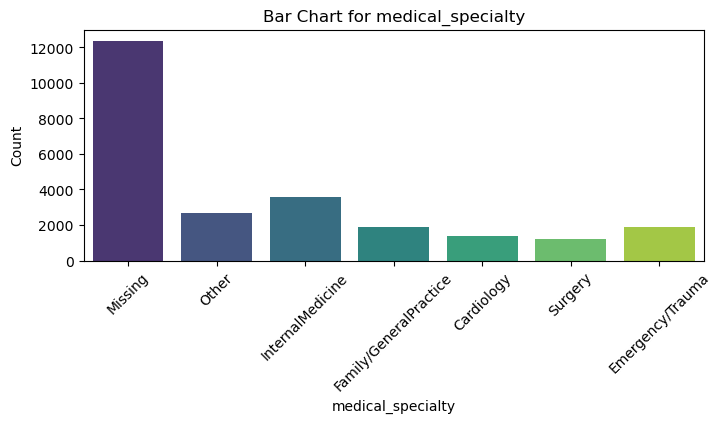

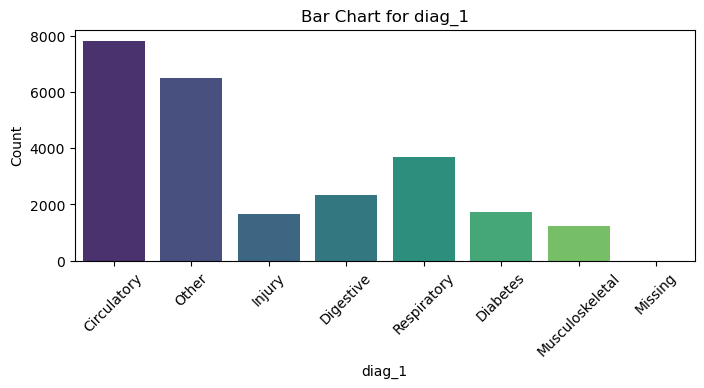

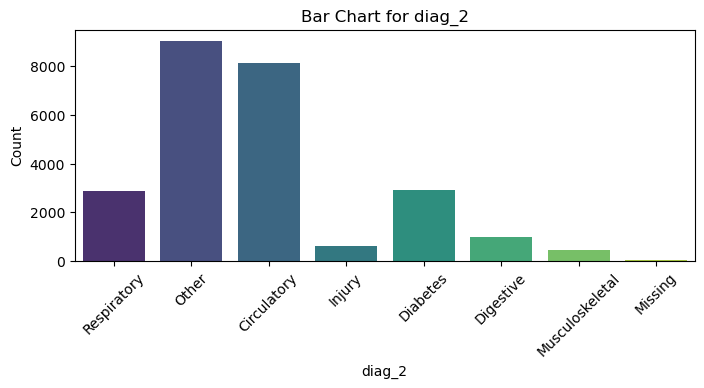

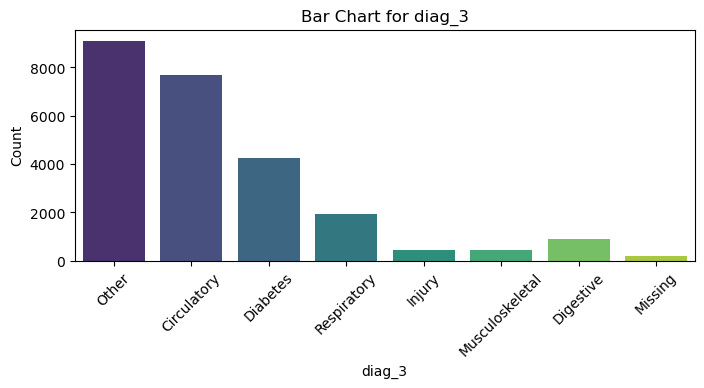

In [26]:
categorical_columns = ['medical_specialty', 'diag_1', 'diag_2', 'diag_3']

for col in categorical_columns:
    plt.figure(figsize=(8, 3))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Bar Chart for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


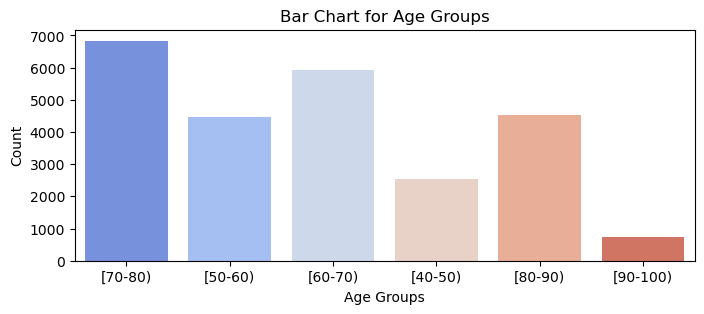

In [27]:
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='age', palette='coolwarm')
plt.title('Bar Chart for Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

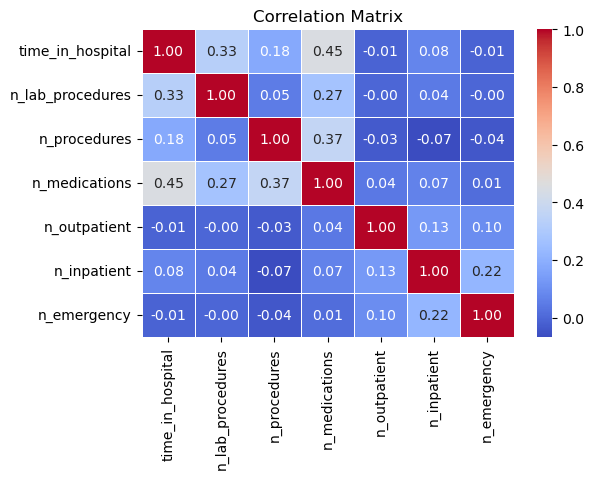

In [28]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


##### No correlation identified in the variables, hence we will retain all.

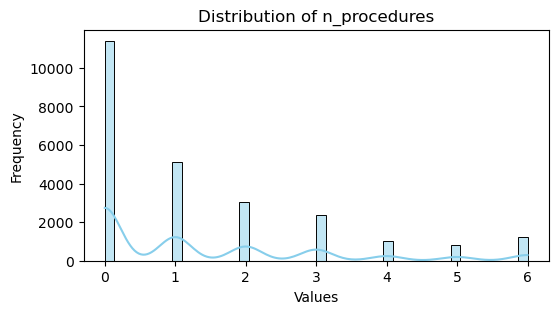

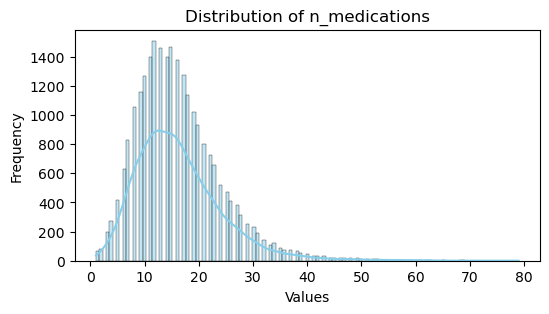

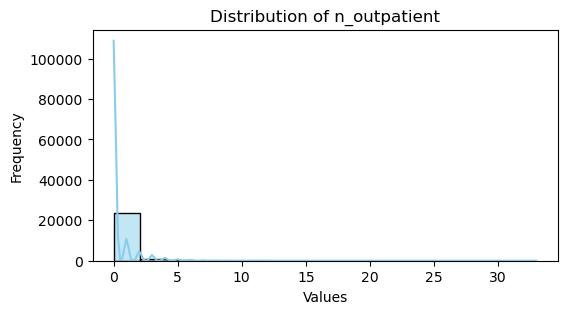

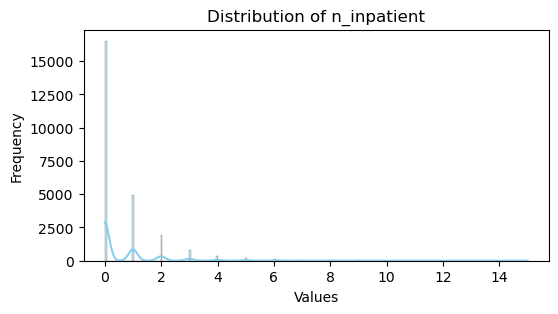

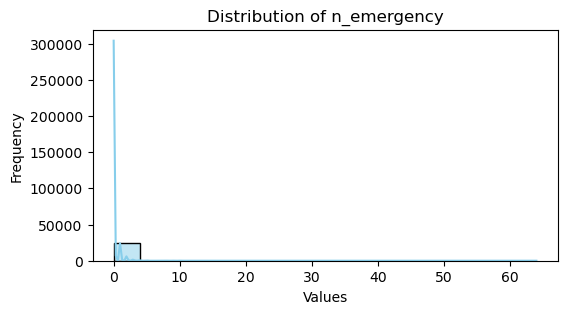

In [29]:
# Example for a numerical column, 'numerical_column'
numerical_columns = ['n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

for col in numerical_columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()


##### Altough the data is right skewed, but we can keep exploring further.

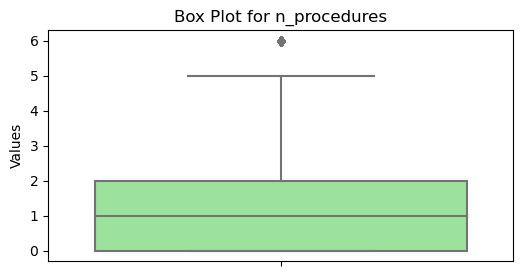

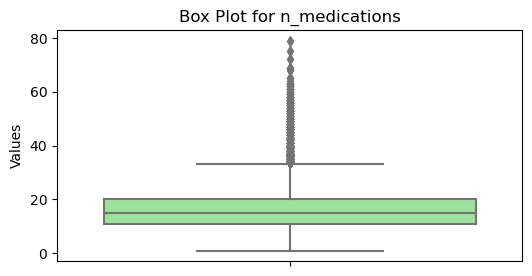

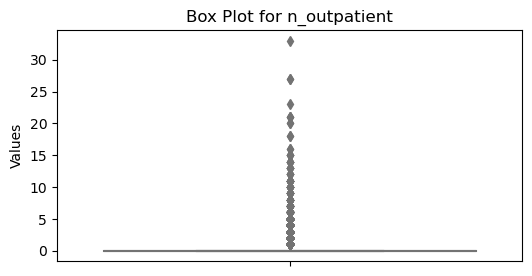

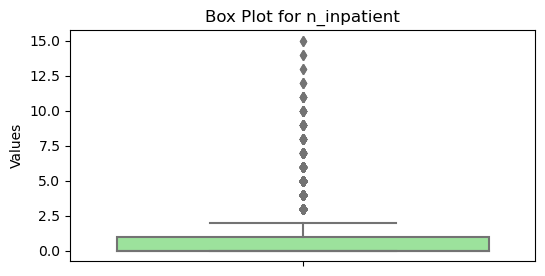

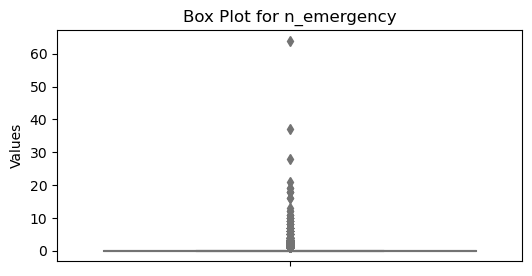

In [30]:
# Example for a numerical column, 'numerical_column'
numerical_columns = ['n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

for col in numerical_columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f'Box Plot for {col}')
    plt.ylabel('Values')
    plt.show()

##### We have already discussed that there are several outliers in the data, but we decided to keep going with it for now.

C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because n

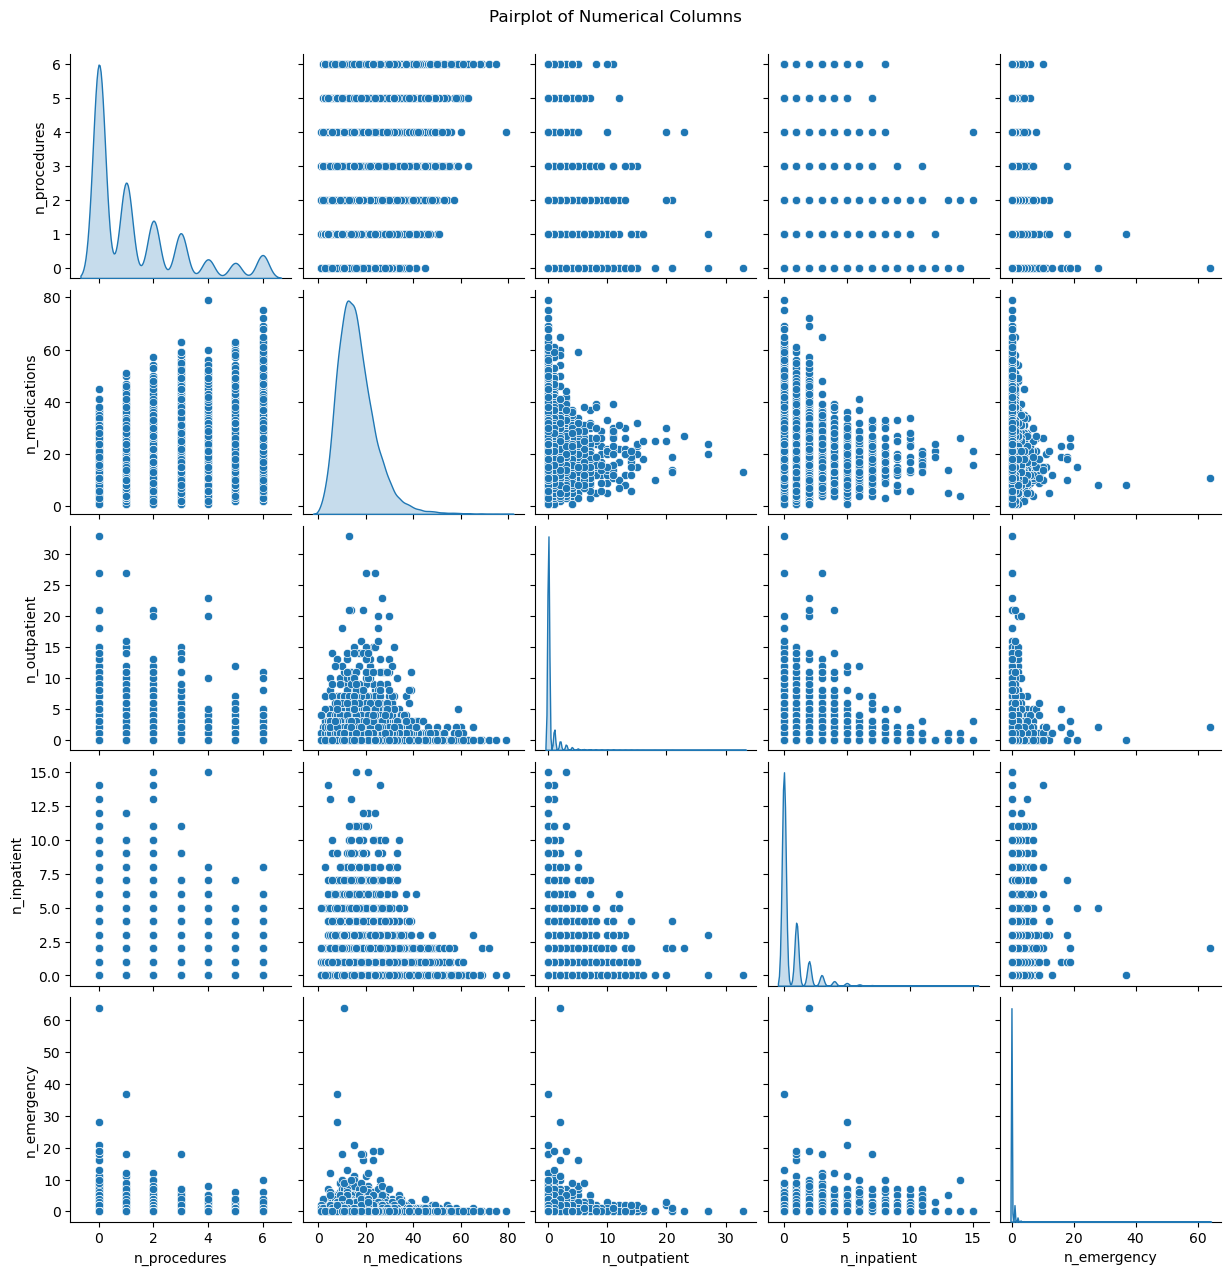

In [31]:
# Subset for numerical columns
numerical_columns = ['n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']  
df_num = df[numerical_columns]
sns.pairplot(df_num, diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot of Numerical Columns', y=1.02)  # Adjust the title position
plt.show()


##### So far, we are unable to find any correlation or linear relationship in the dataset. Lets move ahead.

# Feature Engineering and Transforming Data

In [32]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [53]:
df['age'].unique()

array(['[70-80)', '[50-60)', '[60-70)', '[40-50)', '[80-90)', '[90-100)'],
      dtype=object)

In [76]:
# Manually mapping the age columns
age_mapping = {'[70-80)': 4, '[50-60)': 2, '[60-70)': 3, '[40-50)': 1, '[80-90)': 5, '[90-100)': 6}
df['age'] = df['age'].map(age_mapping)

In [35]:
df.medical_specialty.value_counts()

medical_specialty
Missing                   12382
InternalMedicine           3565
Other                      2664
Emergency/Trauma           1885
Family/GeneralPractice     1882
Cardiology                 1409
Surgery                    1213
Name: count, dtype: int64

In [36]:
df.diag_1.value_counts()

diag_1
Circulatory        7824
Other              6498
Respiratory        3680
Digestive          2329
Diabetes           1747
Injury             1666
Musculoskeletal    1252
Missing               4
Name: count, dtype: int64

In [70]:
# Getting dummy varibales for medical speciality and diagnoses
df = pd.get_dummies(df, columns=['medical_specialty', 'diag_1', 'diag_2', 'diag_3'], dtype=int)

In [71]:
# Droping the columns that contain "Missing" in their names
columns_to_drop = [col for col in df.columns if 'Missing' in col]
df.drop(columns=columns_to_drop, inplace=True)

In [72]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,glucose_test,A1Ctest,change,diabetes_med,readmitted,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Other,medical_specialty_Surgery,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory
0,[70-80),8,72,1,18,2,0,0,no,no,no,yes,no,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,[70-80),3,34,2,13,0,0,0,no,no,no,yes,no,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,[50-60),5,45,0,18,0,0,0,no,no,yes,yes,yes,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,[70-80),2,36,0,12,1,0,0,no,no,yes,yes,yes,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,[60-70),1,42,0,7,0,0,0,no,no,no,yes,no,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
df.diabetes_med.value_counts()

diabetes_med
yes    19228
no      5772
Name: count, dtype: int64

In [41]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted',
       'medical_specialty_Cardiology', 'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_InternalMedicine', 'medical_specialty_Other',
       'medical_specialty_Surgery', 'diag_1_Circulatory', 'diag_1_Diabetes',
       'diag_1_Digestive', 'diag_1_Injury', 'diag_1_Musculoskeletal',
       'diag_1_Other', 'diag_1_Respiratory', 'diag_2_Circulatory',
       'diag_2_Diabetes', 'diag_2_Digestive', 'diag_2_Injury',
       'diag_2_Musculoskeletal', 'diag_2_Other', 'diag_2_Respiratory',
       'diag_3_Circulatory', 'diag_3_Diabetes', 'diag_3_Digestive',
       'diag_3_Injury', 'diag_3_Musculoskeletal', 'diag_3_Other',
       'diag_3_Respiratory'],
      dtype='object')

In [73]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df[['glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
df = pd.concat([df.drop(['glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted'], axis=1), encoded_df], axis=1)


In [74]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Other,medical_specialty_Surgery,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,glucose_test_no,glucose_test_normal,A1Ctest_no,A1Ctest_normal,change_yes,diabetes_med_yes,readmitted_yes
0,[70-80),8,72,1,18,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,[70-80),3,34,2,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,[50-60),5,45,0,18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
3,[70-80),2,36,0,12,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4,[60-70),1,42,0,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [75]:
# Lets normalize the specified columns

columns_to_normalize = ['time_in_hospital', 'n_lab_procedures', 'n_procedures','n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head()


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Other,medical_specialty_Surgery,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,glucose_test_no,glucose_test_normal,A1Ctest_no,A1Ctest_normal,change_yes,diabetes_med_yes,readmitted_yes
0,[70-80),0.538462,0.633929,0.166667,0.217949,0.060606,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,[70-80),0.153846,0.294643,0.333333,0.153846,0.000000,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,[50-60),0.307692,0.392857,0.000000,0.217949,0.000000,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
3,[70-80),0.076923,0.312500,0.000000,0.141026,0.030303,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4,[60-70),0.000000,0.366071,0.000000,0.076923,0.000000,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0


###### Although there are 4 missing values in primary diagnosis, but there are diagnosis in other two columns so will keep it.

# Machine Learning Algorithms

In [78]:
pd.set_option('display.max_columns', None)

In [79]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Other,medical_specialty_Surgery,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,glucose_test_no,glucose_test_normal,A1Ctest_no,A1Ctest_normal,change_yes,diabetes_med_yes,readmitted_yes
0,4,0.538462,0.633929,0.166667,0.217949,0.060606,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,4,0.153846,0.294643,0.333333,0.153846,0.000000,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,0.307692,0.392857,0.000000,0.217949,0.000000,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
3,4,0.076923,0.312500,0.000000,0.141026,0.030303,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4,3,0.000000,0.366071,0.000000,0.076923,0.000000,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [80]:
# lets define our variables
X = df.drop(columns=['readmitted_yes'])

In [81]:
y = df.readmitted_yes

In [82]:
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: readmitted_yes, dtype: float64

In [83]:
# lets split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [90]:
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)
log_model.score(X_test, y_test)

0.6096

In [106]:
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X_train, y_train)
dec_tree.score(X_test, y_test)

0.6098666666666667

In [95]:
rf_model = RandomForestClassifier(n_estimators=1000)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.6072

In [100]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=1000, learning_rate= 0.001 )
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.6108

In [105]:
# Get feature importances
importances = dec_tree.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top important features
print(feature_importance_df)


                                     Feature  Importance
2                           n_lab_procedures    0.183255
4                              n_medications    0.142662
1                           time_in_hospital    0.095333
0                                        age    0.053214
3                               n_procedures    0.051933
6                                n_inpatient    0.050331
26                              diag_2_Other    0.021914
14                        diag_1_Circulatory    0.020548
33                              diag_3_Other    0.019831
39                                change_yes    0.019505
28                        diag_3_Circulatory    0.017738
21                        diag_2_Circulatory    0.017395
19                              diag_1_Other    0.017223
5                               n_outpatient    0.016714
7                                n_emergency    0.016065
20                        diag_1_Respiratory    0.015822
22                           di

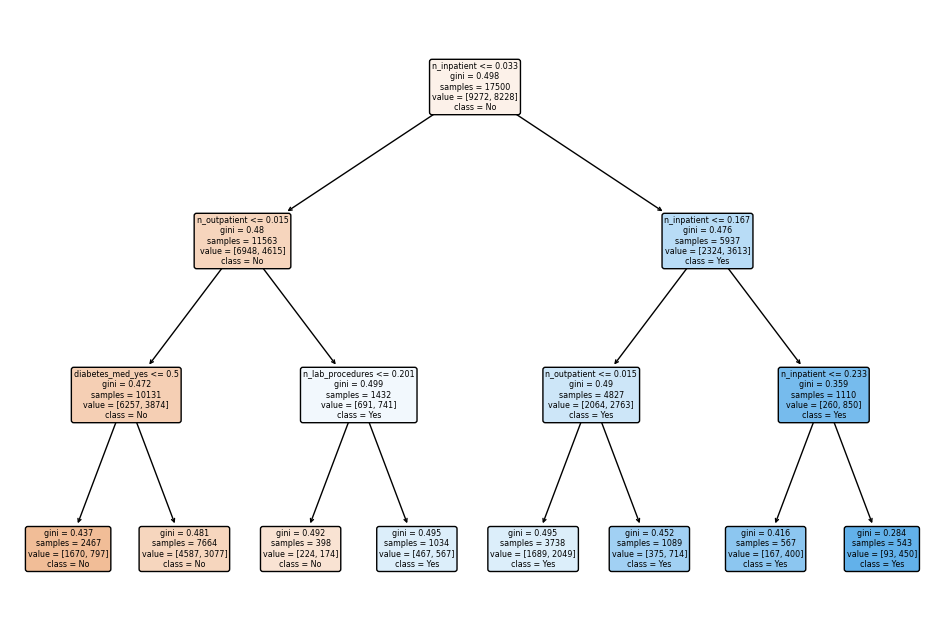

In [110]:
plt.figure(figsize=(12, 8))  # Set the figure size
plot_tree(dec_tree, filled=True, feature_names=X_train.columns.to_list, class_names=['No', 'Yes'], rounded=True)
plt.show()

In [116]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Initialize an empty dictionary to store the scores for each model
model_scores = {}

# List of models and their names
models = {
    "Logistic Regression": log_model,
    "Decision Tree": dec_tree,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
}

# Iterate through each model, make predictions, and calculate metrics
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    model_scores[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
    }

# Convert the dictionary to a pandas DataFrame for better visualization
score_df = pd.DataFrame(model_scores).T  # Transpose to have models as rows
print(score_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.609600   0.630000  0.410947  0.497425
Decision Tree        0.609867   0.600469  0.508508  0.550676
Random Forest        0.607200   0.594771  0.516166  0.552688
XGBoost              0.610800   0.622428  0.437606  0.513905
